In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

In [84]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[0])
    sum_y = np.sum(arr[1])
    return np.array([sum_x / length, sum_y / length])

In [66]:
for i in range(10):
    folderoots = f"../data/processed/ignored_files/utg_variable_grid_random/size_{3+i}/"
    df = pd.read_json(folderoots + "auc_table.json")
    fig, axs = plt.subplots(1, 2)
    sns.histplot(df, x="AUC of Coverage", ax=axs[0])
    sns.histplot(df, x="AUC of Directness", ax=axs[1])
    fig.savefig(folderoots + "histograms.png", dpi=100)
    plt.close()
    fig, axs = plt.subplots(1, 2)
    sns.histplot(df[df["Order"] == "additive"], x="AUC of Coverage", ax=axs[0])
    sns.histplot(df[df["Order"] == "additive"], x="AUC of Directness", ax=axs[1])
    fig.savefig(folderoots + "histograms_additive.png", dpi=100)
    plt.close()
    fig, axs = plt.subplots(1, 2)
    sns.histplot(df[df["Order"] == "subtractive"], x="AUC of Coverage", ax=axs[0])
    sns.histplot(df[df["Order"] == "subtractive"], x="AUC of Directness", ax=axs[1])
    fig.savefig(folderoots + "histograms_subtractive.png", dpi=100)
    plt.close()

In [106]:
centroids = []
ttest = []
for i in range(10):
    folderoots = f"../data/processed/ignored_files/utg_variable_grid_random/size_{3+i}/"
    df = pd.read_json(folderoots + "auc_table.json")
    arr_add = np.array(
        [
            df[df["Order"] == "additive"]["AUC of Directness"].values,
            df[df["Order"] == "additive"]["AUC of Coverage"].values,
        ]
    )
    arr_sub = np.array(
        [
            df[df["Order"] == "subtractive"]["AUC of Directness"].values,
            df[df["Order"] == "subtractive"]["AUC of Coverage"].values,
        ]
    )
    centroids.append([centeroidnp(arr_add), centeroidnp(arr_sub)])
    ttest.append(sp.stats.ttest_ind(arr_add, arr_sub, axis=1))
ttest = np.array(ttest)

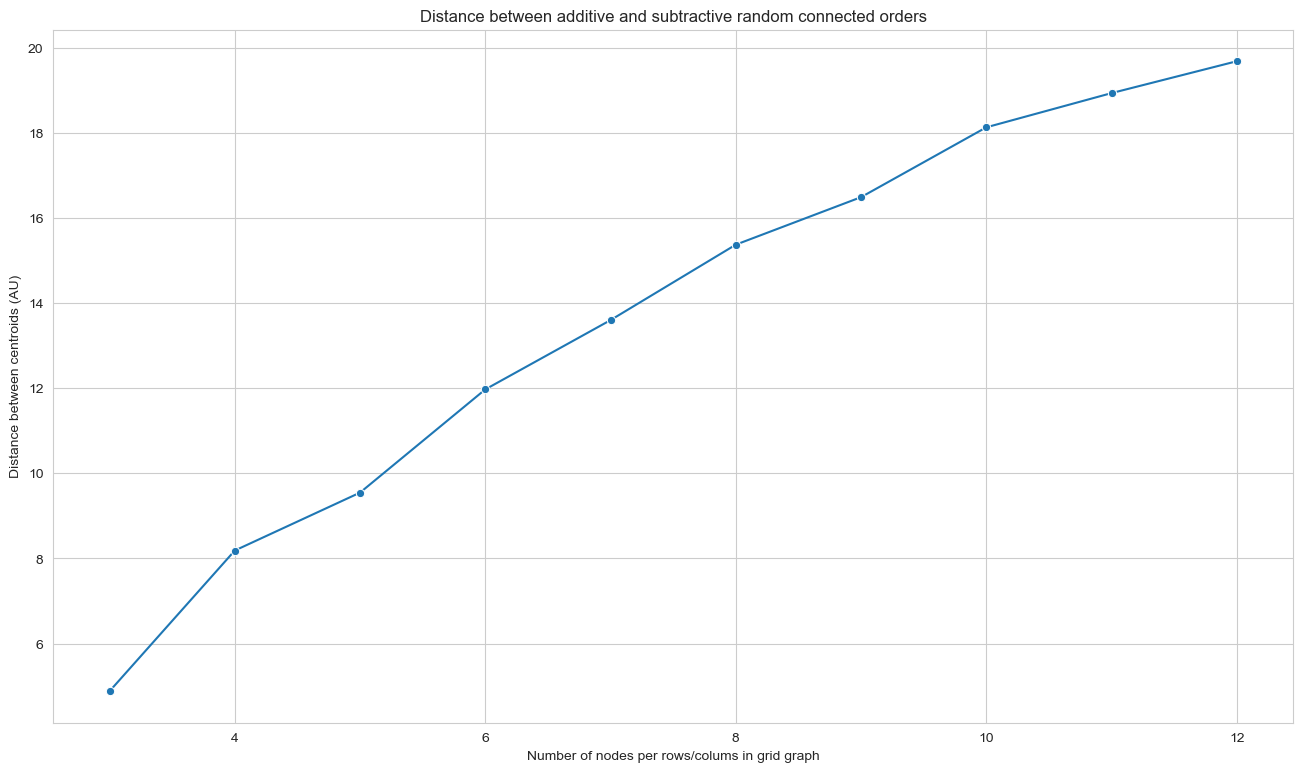

In [99]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(
    x=range(3, 13),
    y=[np.linalg.norm(arr[1] - arr[0]) for arr in centroids],
    ax=ax,
    marker="o",
)
ax.set_xlabel("Number of nodes per rows/colums in grid graph")
ax.set_ylabel("Distance between centroids (AU)")
ax.set_title("Distance between additive and subtractive random connected orders")
sns.set_style("whitegrid")

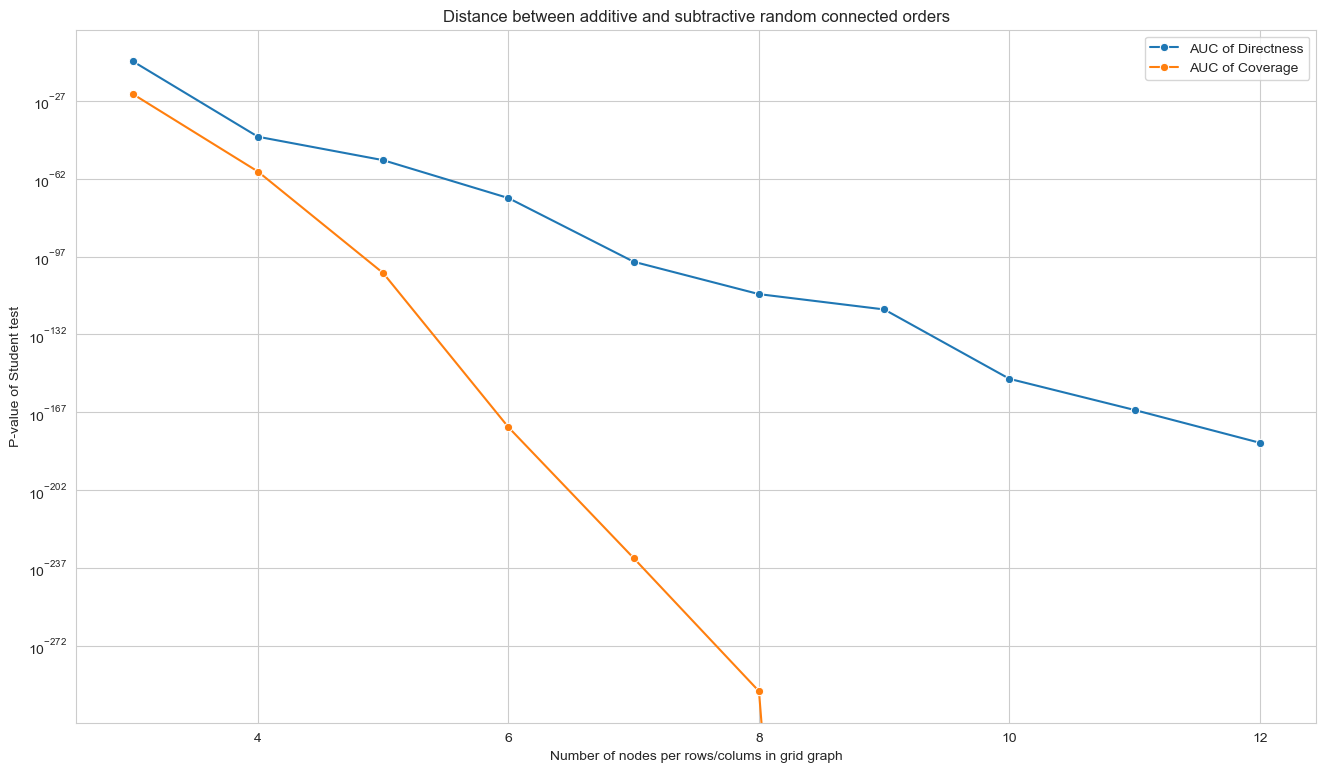

In [120]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(
    x=range(3, 13), y=ttest[:, 1, 0], ax=ax, marker="o", label="AUC of Directness"
)
sns.lineplot(
    x=range(3, 13), y=ttest[:, 1, 1], ax=ax, marker="o", label="AUC of Coverage"
)
ax.set_xlabel("Number of nodes per rows/colums in grid graph")
ax.set(yscale="log")
ax.set_ylabel("P-value of Student test")
ax.set_title("Distance between additive and subtractive random connected orders")
sns.set_style("whitegrid")